# Fitting to Heap's Law and Exponential

https://journals.sagepub.com/doi/full/10.1177/1177932220938064

https://reader.elsevier.com/reader/sd/pii/S1369527408001239?token=0539D7F28E21BB85E8E3F1EC0E4031EDC7D94C609C452631032FAD8FDDE1B3A5C804C6F1B4A89ABDE8BE2FFB95A85309&originRegion=us-east-1&originCreation=20210830173250

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Genome.pangenome_intrinsic_info.count_core_acc import *
clstr_csv = '/home/hermuba/nas2/cdhit/ecoli.clstr.csv'
df = pd.read_csv('/home/hermuba/nas2/cdhit/pangenome_grow_stat.csv', header = 1)

#### OUTPUT #####
fig_path = '/nas2/users/hermuba/fig'

In [2]:
count, pan_size, clstr_df = gene_distribution(clstr_csv)

In [3]:
results = []
no_iter = 20
for n_iter in range(no_iter):
    print(n_iter)
    genome_order = np.random.permutation(clstr_df.shape[1])
    permuted = clstr_df.iloc[:, genome_order]
    grow, n_genomes = pangenome_profile(permuted, bins = 30)
    results.append(grow.values) # append stats into np
    
# calculate mean and std
test = np.array(np.stack(results),dtype=np.float64) # weird bug

0
1
2
3


KeyboardInterrupt: 

In [ ]:
pd.DataFrame(test[:,:,2]).to_csv('growth_stat.csv')

In [4]:
test = pd.read_csv('growth_stat.csv', index_col = 0).values

In [5]:
test.shape

(20, 30)

In [6]:
n_genomes=np.array(n_genomes)

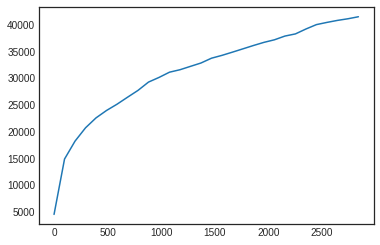

In [7]:

x = n_genomes
plt.plot(x, np.median(test, axis = 0))

<AxesSubplot:xlabel='# Extended core thres 2901.69 (7%)', ylabel='pangenome'>

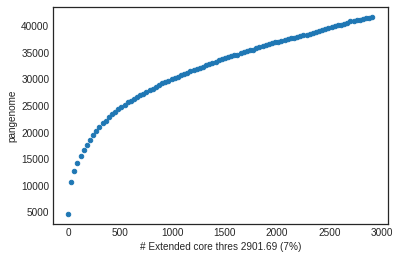

In [8]:
df.plot.scatter(x='# Extended core thres 2901.69 (7%)', y = 'pangenome')

In [9]:
from scipy.optimize import curve_fit

def heaps_law(N, k, alpha):
    '''where an α lower than 1 is representative of an open pan-genome and an α higher than 1 is representative of a closed pan-genome.'''
    # 𝑛=𝑘𝑁−𝛼
    return k* N**(-alpha)

def expo_regression_decay(x, k, tau, c):
    #𝑛=𝑘𝑒−𝑥/𝜏+𝑡𝑔𝜃
    
    return k*np.exp(-x/tau) + c
    
    

In [10]:
n_genes = np.median(test, axis = 0)
n_genes = np.array([0]+list(n_genes))
new_gene=np.diff(n_genes, axis = 0)

popt, pcov = curve_fit(heaps_law, n_genomes+1 , new_gene)

/home/hermuba/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


In [ ]:
n_genomes

In [11]:
popt_tg, pcov_tg = curve_fit(expo_regression_decay,n_genomes+1, new_gene)

In [ ]:
popt

In [ ]:
new_gene

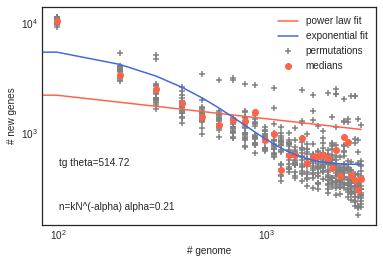

In [13]:


y_pred = heaps_law(n_genomes+1, popt[0], popt[1])
f, ax = plt.subplots()


for i in range(test.shape[0]):
    ax.scatter(n_genomes, np.diff([0]+list(test[i,:])), label = 'permutations', color = 'grey', marker = '+')

ax.plot(n_genomes,y_pred, label = 'power law fit', color = 'tomato')
ax.scatter(n_genomes,new_gene, color = 'tomato', label = 'medians')
ax.text(100, 200, f'n=kN^(-alpha) alpha={popt[1]:.2f}')

y = expo_regression_decay(n_genomes, popt_tg[0], popt_tg[1], popt_tg[2])
ax.plot(x,y, label = 'exponential fit', color = 'royalblue')
ax.text(100, 500, f'tg theta={popt_tg[2]:.2f}')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

ax.set_xlabel('# genome')
ax.set_ylabel('# new genes')

ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_ylim(0, 10000)
#ax.set_xlim(10,5000)

plt.savefig(os.path.join(fig_path,'growth_curve_powerlawfit.svg'), format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')
f.show()
